# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, across elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*The problem I will be looking at in this project concerns jobs in data science. Specifically, available job positions in different cities. One dataset is data science jobs in Atlanta and the other dataset is data science jobs in Boston.*

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: *CSV file*

Method: *This data was picked because I wanted to examine data science jobs in Atlanta available scraped from Indeed by Kaggle user Shanshan Lu in 2018. The data was gathered using the "Downloading files manually" method from the kaggle.com site: https://www.kaggle.com/datasets/sl6149/data-scientist-job-market-in-the-us/data*. The file, **fulltimeAL.csv**, was download as a zip file, was then unzipped, the CSV file was extracted and then uploaded to this project.

Dataset variables:

*   *Variable 1 - position: name of job position* 
*   *Variable 2 - company: name of company for job position* 
*   *Variable 3 - description: summary that describes the job*
*   *Variable 4 - numreview: amount of reviews for job*
*   *Variable 5 - location: location of job position*

In [1]:
#FILL IN 1st data gathering and loading method
import pandas as pd

#convert csv to dataframe
atljobs_df = pd.read_csv('original_data/fulltimeAL.csv')

#### Dataset 2

Type: *CSV file*

Method: *This data was picked because I wanted to examine data science jobs in Boston available scraped from Indeed by Kaggle user Shanshan Lu in 2018. The data was gathered using the "Programmatically downloading files" method from the kaggle.com site: https://www.kaggle.com/datasets/sl6149/data-scientist-job-market-in-the-us/data*. The archive ZIP file was downloaded from the site and unloaded to this project. Since the target file was **fulltimeBOS.csv**, the local ZIP archive was used to extract the target file to be used to this project.

Dataset variables:

*   *Variable 1 - position: name of job position* 
*   *Variable 2 - company: name of company for job position* 
*   *Variable 3 - description: summary that describes the job*
*   *Variable 4 - numreview: amount of reviews for job*
*   *Variable 5 - location: location of job position*

In [2]:
#FILL IN 2nd data gathering and loading method
#https://favtutor.com/blogs/zipfile-python

import zipfile

with zipfile.ZipFile("original_data/archive.zip","r") as zip_ref:
    zip_ref.extract("fulltimeBOS.csv")

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [3]:
#Optional: store the raw data in your local data store
import shutil

original_path = "fulltimeBOS.csv"
destination_path = "original_data/"+original_path
shutil.move(original_path, destination_path)
bosjobs_df = pd.read_csv('original_data/fulltimeBOS.csv')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing data

In [4]:
#Name of column Value - Inspecting the dataframe visually
atljobs_df

,position,company,description,numreview,location
0,Development Director,ALS TDI,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"<span id=""job_summary"" class=""summary""><div>Jo...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"<span id=""job_summary"" class=""summary""><p><b>D...",44 reviews,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
...,...,...,...,...,...
264,Systems Software Engineer,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
265,Digital Marketing Consultant - Automotive Reta...,CDK Global,"<span id=""job_summary"" class=""summary""><div><p...",230 reviews,"Atlanta, GA 30301"
266,Senior Packaging Engineer I - PET,The Coca-Cola Company,"<span id=""job_summary"" class=""summary""><b>Job ...","7,236 reviews","Atlanta, GA 30301"
267,"Account Executive Fraud Solutions, Acquiring E...",Payments & Cards Network,"<span id=""job_summary"" class=""summary""><div><h...",NaN,"Atlanta, GA"


In [5]:
#FILL IN - Inspecting the dataframe programmatically
print(atljobs_df.isna().sum())

position        0
company         0
description     0
numreview      42
location        0
dtype: int64


Issue and justification: *The issue with this data set is Missing data. There are some rows with missing values or null values present in the data.*

### Quality Issue 2: Validity

In [6]:
#FILL IN - Inspecting the dataframe visually
atljobs_df

,position,company,description,numreview,location
0,Development Director,ALS TDI,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"<span id=""job_summary"" class=""summary""><div>Jo...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"<span id=""job_summary"" class=""summary""><p><b>D...",44 reviews,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
...,...,...,...,...,...
264,Systems Software Engineer,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
265,Digital Marketing Consultant - Automotive Reta...,CDK Global,"<span id=""job_summary"" class=""summary""><div><p...",230 reviews,"Atlanta, GA 30301"
266,Senior Packaging Engineer I - PET,The Coca-Cola Company,"<span id=""job_summary"" class=""summary""><b>Job ...","7,236 reviews","Atlanta, GA 30301"
267,"Account Executive Fraud Solutions, Acquiring E...",Payments & Cards Network,"<span id=""job_summary"" class=""summary""><div><h...",NaN,"Atlanta, GA"


In [7]:
#FILL IN - Inspecting the dataframe programmatically
atljobs_df.dtypes

position       object
company        object
description    object
numreview      object
location       object
dtype: object

Issue and justification: *The issue with this data set is Validity. Specifically, the numreview column is about the number of reviews for a job position. This should be a numerical data type, not an object.*

### Tidiness Issue 1: Columns containing multiple variables

In [8]:
#FILL IN - Inspecting the dataframe visually
bosjobs_df

,position,company,description,numreview,location
0,Robotics and Automation – Research Analyst,Lux Research Inc,"<span id=""job_summary"" class=""summary""><div><p...",NaN,"Boston, MA"
1,Senior Account Executive,h2o.ai,"<span id=""job_summary"" class=""summary""><div><p...",NaN,"Boston, MA"
2,Marketing Information Analytics Coordinator,VHB,"<span id=""job_summary"" class=""summary""><div><p...",22 reviews,"Boston, MA 02110"
3,ERP Implementation Specialist,Lovepop,"<span id=""job_summary"" class=""summary""><div><d...",2 reviews,"Boston, MA"
4,Field Application Scientist - Boston,10x Genomics,"<span id=""job_summary"" class=""summary""><b>Regi...",NaN,"Boston, MA"
...,...,...,...,...,...
624,Data Scientist,Recorded Future,"<span id=""job_summary"" class=""summary"">Want to...",NaN,"Boston, MA"
625,User Research Data Analyst Intern for Mental H...,Affect Mental Health,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Boston, MA"
626,Atmospheric Data Scientist / Meteorologist,ClimaCell,"<span id=""job_summary"" class=""summary"">ClimaCe...",NaN,"Boston, MA 02111"
627,Sr. Data Scientist,Pluralsight,"<span id=""job_summary"" class=""summary""><div>Jo...",8 reviews,"Boston, MA"


In [9]:
#FILL IN - Inspecting the dataframe programmatically
bosjobs_df['location'].unique()

array(['Boston, MA', 'Boston, MA 02110', 'Boston, MA 02129',
       'Boston, MA 02116', 'Boston, MA 02111', 'Boston, MA 02298',
       'Boston, MA 02109', 'Boston, MA 02210', 'Boston, MA 02212',
       'Boston, MA 02215', 'Boston, MA 02114', 'Boston, MA 02199',
       'Boston, MA 02134', 'Boston, MA 02108', 'Boston, MA 02201',
       'Boston, MA 02115', 'Boston, MA 02118'], dtype=object)

Issue and justification: *The issue with this data set is Columns contain multiple variables. Specifically, the location column containing the job's city, state and and zip cope.*

### Tidiness Issue 2: Untidy data structure

In [10]:
#FILL IN - Inspecting the dataframe visually
bosjobs_df

,position,company,description,numreview,location
0,Robotics and Automation – Research Analyst,Lux Research Inc,"<span id=""job_summary"" class=""summary""><div><p...",NaN,"Boston, MA"
1,Senior Account Executive,h2o.ai,"<span id=""job_summary"" class=""summary""><div><p...",NaN,"Boston, MA"
2,Marketing Information Analytics Coordinator,VHB,"<span id=""job_summary"" class=""summary""><div><p...",22 reviews,"Boston, MA 02110"
3,ERP Implementation Specialist,Lovepop,"<span id=""job_summary"" class=""summary""><div><d...",2 reviews,"Boston, MA"
4,Field Application Scientist - Boston,10x Genomics,"<span id=""job_summary"" class=""summary""><b>Regi...",NaN,"Boston, MA"
...,...,...,...,...,...
624,Data Scientist,Recorded Future,"<span id=""job_summary"" class=""summary"">Want to...",NaN,"Boston, MA"
625,User Research Data Analyst Intern for Mental H...,Affect Mental Health,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Boston, MA"
626,Atmospheric Data Scientist / Meteorologist,ClimaCell,"<span id=""job_summary"" class=""summary"">ClimaCe...",NaN,"Boston, MA 02111"
627,Sr. Data Scientist,Pluralsight,"<span id=""job_summary"" class=""summary""><div>Jo...",8 reviews,"Boston, MA"


In [11]:
#FILL IN - Inspecting the dataframe programmatically
bosjobs_df['description'][0]

'<span id="job_summary" class="summary"><div><p><b>Robotics and Automation – Research Analyst (Boston)</b></p>\n<p>Lux Research is looking for candidates with strong technical capability in robotics and automation, who are looking to use that knowledge to assess the commercial viability and roadmap for emerging technologies.</p>\n<p>Lux Research provides a unique environment to bolster technical knowledge with business skills, by serving clients interested in monetizing emerging technologies. Clients include multi-national electronics, materials, and industrial companies in addition to investor and government groups.</p>\n<p>Qualified candidates will have background in either components (e.g. sensors, machine vision systems, machine learning), and/or automated systems (e.g. robots, autonomous vehicles, drones).</p>\n<p>This position does not involve lab-work; rather it involves building on technical expertise through additional primary and secondary research to identify the best opport

Issue and justification: *The issue with this data set is Untidy data structure. The description column is still shown in HTML format. It needs to be in a string format instead.*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [12]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
atl_subset = atljobs_df.copy()
boston_subset = bosjobs_df.copy()

### **Quality Issue 1: Missing data**

In [13]:
# FILL IN - Apply the cleaning strategy
atl_subset = atl_subset.dropna()
boston_subset = boston_subset.dropna()

In [14]:
# FILL IN - Validate the cleaning was successful
print("Number of null values in atl_subset: ", atl_subset.isnull().sum().sum())
print("Number of null values in city_subset: ", boston_subset.isnull().sum().sum())

Number of null values in atl_subset:  0
Number of null values in city_subset:  0


Justification: *Null values were removed from both data sets because it made the data incomplete.*

### **Quality Issue 2: Validity**

In [15]:
#FILL IN - Apply the cleaning strategy
#https://blog.hubspot.com/website/pandas-split-string
#https://stackoverflow.com/questions/38387529/how-to-iterate-over-pandas-series-generated-from-groupby-size
#https://note.nkmk.me/en/python-str-num-conversion/
#https://www.geeksforgeeks.org/python-list-comprehension/

#split numreview
atl_review = atl_subset['numreview'].str.split(pat=' ', expand=True)
bos_review = boston_subset['numreview'].str.split(pat=' ', expand=True)

#remove comma from reviews
atl_review[0] = [int(review.replace(',','')) for review in atl_review[0]]
bos_review[0] = [int(review.replace(',','')) for review in bos_review[0]]

#set int_review to numreview column
atl_subset['numreview'] = atl_review[0]
boston_subset['numreview'] = bos_review[0]

In [16]:
#FILL IN - Validate the cleaning was successful
print("Data types of atl_subset: ", atl_subset.dtypes)
print("Data types of boston_subset: ", boston_subset.dtypes)

Data types of atl_subset:  position       object
company        object
description    object
numreview       int64
location       object
dtype: object
Data types of boston_subset:  position       object
company        object
description    object
numreview       int64
location       object
dtype: object


Justification: *The **numreview** column is meant to count the number of reviews associated with the job. Since this a column that is supposed to count numerical values, this column was converted from a string to an int column. *

### **Tidiness Issue 1: Columns containing multiple variables**

In [17]:
#FILL IN - Apply the cleaning strategy
#https://blog.hubspot.com/website/pandas-split-string

#split location column in atl_subset into city and state
atl_city_only = atl_subset['location'].str.rsplit(pat=" ", expand=True)[0].str.split(pat=',', expand=True)[0]
atl_state_only = atl_subset['location'].str.rsplit(pat=" ", expand=True)[1]

#split location column in boston_subset into city and state
bos_city_only = boston_subset['location'].str.rsplit(pat=" ", expand=True)[0].str.split(pat=',', expand=True)[0]
bos_state_only = boston_subset['location'].str.rsplit(pat=" ", expand=True)[1]

#replace location column and create new column state
atl_subset['location'] = atl_city_only
atl_subset['state'] = atl_state_only

boston_subset['location'] = bos_city_only
boston_subset['state'] = bos_state_only

In [18]:
#FILL IN - Validate the cleaning was successful
atl_subset.head()

,position,company,description,numreview,location,state
3,Data Analyst,Operation HOPE,"<span id=""job_summary"" class=""summary""><p><b>D...",44,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550,Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,"<span id=""job_summary"" class=""summary""><div><d...",385,Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,"<span id=""job_summary"" class=""summary""><div><d...",385,Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,"<span id=""job_summary"" class=""summary""><div><h...",899,Atlanta,GA


In [19]:
#FILL IN - Validate the cleaning was successful
boston_subset.head()

,position,company,description,numreview,location,state
2,Marketing Information Analytics Coordinator,VHB,"<span id=""job_summary"" class=""summary""><div><p...",22,Boston,MA
3,ERP Implementation Specialist,Lovepop,"<span id=""job_summary"" class=""summary""><div><d...",2,Boston,MA
5,Associate Research Analyst,Harvard Pilgrim Health Care,"<span id=""job_summary"" class=""summary""><div><d...",61,Boston,MA
6,Senior Scientist/Data Analytics/Applied PRO,Pharmerit International,"<span id=""job_summary"" class=""summary""><div><p...",5,Boston,MA
9,"Energy Efficiency Specialist, Cambridge, MA",ICF,"<span id=""job_summary"" class=""summary""><div><p...",392,Boston,MA


Justification: *There were multiple values in the location column: city, state, and zip code. Since there main differentiation between the two datasets used is the city and state, each of these two elements needed their own separate column to provide clarity.*

### **Tidiness Issue 2: Untidy data structure**

In [26]:
#FILL IN - Apply the cleaning strategy
#https://bobbyhadz.com/blog/python-remove-html-tags-from-string#:~:text=Use%20the%20re.,replacing%20them%20with%20empty%20strings.
import re

#set variable for apttern to detect
pattern = re.compile('<.*?>')

#create variables with cleaned descriptions
clean_boston_desc = [re.sub(pattern, '', job) for job in boston_subset['description']]
clean_atl_desc = [re.sub(pattern, '', job) for job in atl_subset['description']]

#set clean variables to subsets
boston_subset['description'] = clean_boston_desc
atl_subset['description'] = clean_atl_desc

In [27]:
#FILL IN - Validate the cleaning was successful
boston_subset['description']

2      Marketing Information &amp; Analytics Coordina...
3      We are looking for a hungry ERP Implementation...
5      Are you interested in becoming part of a dynam...
6      Pharmerit International is a leading health ca...
9      Working at ICF\n\n\nWorking at ICF means apply...
                             ...                        
618    Summary\n\nNatixis Investment Managers is look...
619    Overview\nAnalysis Group is one of the largest...
620    Data Science - Machine Learning - Statistics -...
627    Job Description\n\nThe Opportunity\nPluralsigh...
628    Facebook's mission is to give people the power...
Name: description, Length: 448, dtype: object

In [28]:
#FILL IN - Validate the cleaning was successful
atl_subset['description']

3      DEPARTMENT: Program OperationsPOSITION LOCATIO...
4      DESCRIPTION\nThe Emory University Department o...
5      Qualifications\nBachelor’s degree in Computer ...
6      Qualifications\nBachelor’s degree\n5-7 years o...
7      Overview / Responsibilities\nWood Environment ...
                             ...                        
263    Georgia Tech Research Institutes's (GTRI) Trus...
264    DESCRIPTION\nThe Georgia Clinical and Translat...
265    Accelerate Your Career\nDrive global technolog...
266    Job ID: R-08728\n\nPosition Overview: Why Join...
268    About Secureworks\nSecureworks (SCWX-NASDAQ) i...
Name: description, Length: 227, dtype: object

Justification: *The description column should be have its structure reformatted. Currently, the words in the description is bookended by HTML tags. The tags need to be removed in order to be more tidy.*

In [59]:
#merge data sets
both_cities_jobs_df = pd.concat([atl_subset, boston_subset], ignore_index=True)

#rename column
both_cities_jobs_df = both_cities_jobs_df.rename(columns={"location":"city"})

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [60]:
#FILL IN - saving data
import os 
folder_name = 'clean_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
both_cities_jobs_df.to_csv('clean_data/both_cities_jobs.csv', index=False, encoding='utf-8')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* The question that I wanted to answer was about data science and data science-related jobs in Boston and Atlanta scraped from Indeed in 2018.

<AxesSubplot: title={'center': 'Frequency of Review Ratings'}, ylabel='Frequency'>

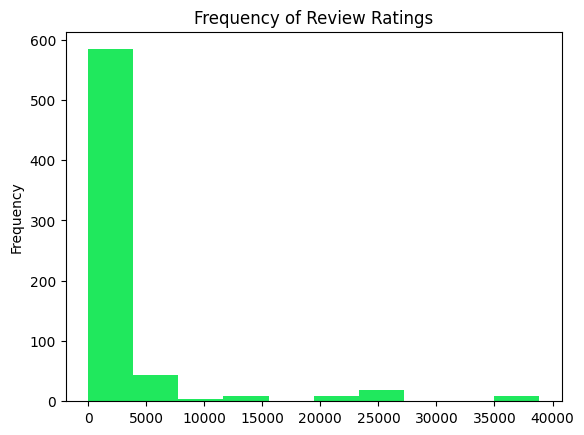

In [61]:
#Visual 1 - FILL IN
both_cities_jobs_df['numreview'].plot(kind="hist",
                                      color='#20E85D',
                                      title="Frequency of Review Ratings")

*Answer to research question: This plot answered the question of what was the most frequent number of reviews associated with a job position.* 

<AxesSubplot: title={'center': 'Average Rating Associated for Jobs by City'}, xlabel='city'>

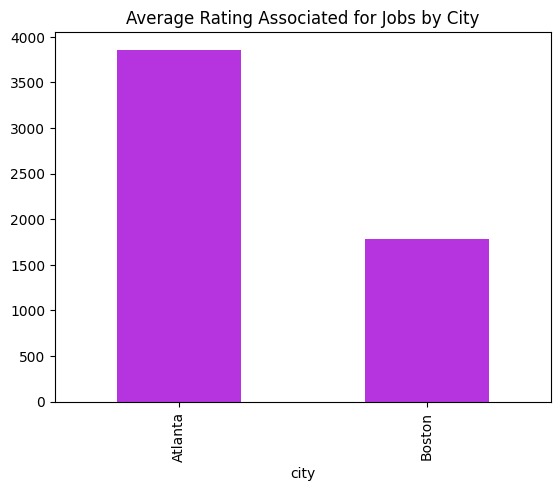

In [82]:
#Visual 2 - FILL IN
#https://realpython.com/pandas-plot-python/
avg_review = both_cities_jobs_df.groupby('city')['numreview'].mean().sort_values(ascending=False).head()
avg_review.plot(kind='bar',
                 color='#B634E0',
                 title='Average Rating Associated for Jobs by City')

*Answer to research question: This plot answered the question of which city had the highest average of review ratings associated with jobs. The answer seems to be Atlanta.* 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project, there is one additional action I would take. That action would be to observe the most common job titles for each city.